In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math

In [18]:
df = pd.read_csv(r'E:\Capstone-Project-main\Capstone-Project-main\storedata_total.csv')
df.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,28-09-2012,11-08-2013,11-08-2013,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,19-12-2010,01-04-2011,19-01-2014,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,03-10-2010,01-12-2010,06-07-2011,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,22-10-2010,28-03-2011,28-03-2011,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,27-11-2010,29-11-2010,28-01-2013,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


In [19]:
df.shape


(30801, 15)

In [20]:
df.dtypes

custid         object
retained        int64
created        object
firstorder     object
lastorder      object
esent           int64
eopenrate     float64
eclickrate    float64
avgorder      float64
ordfreq       float64
paperless       int64
refill          int64
doorstep        int64
favday         object
city           object
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30801 entries, 0 to 30800
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   custid      30781 non-null  object 
 1   retained    30801 non-null  int64  
 2   created     30781 non-null  object 
 3   firstorder  30781 non-null  object 
 4   lastorder   30781 non-null  object 
 5   esent       30801 non-null  int64  
 6   eopenrate   30801 non-null  float64
 7   eclickrate  30801 non-null  float64
 8   avgorder    30801 non-null  float64
 9   ordfreq     30801 non-null  float64
 10  paperless   30801 non-null  int64  
 11  refill      30801 non-null  int64  
 12  doorstep    30801 non-null  int64  
 13  favday      30801 non-null  object 
 14  city        30801 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 3.5+ MB


In [22]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
retained,30801.0,0.794520,0.404059,0.0,1.000000,1.000000,1.000000,1.00
esent,30801.0,28.138405,16.751380,0.0,16.000000,32.000000,42.000000,291.00
eopenrate,30801.0,25.554838,29.557106,0.0,2.040816,13.207547,40.000000,100.00
eclickrate,30801.0,5.671139,10.561704,0.0,0.000000,0.000000,7.142857,100.00
avgorder,30801.0,61.873944,41.007588,0.0,40.020000,50.970000,74.280000,2600.14
ordfreq,30801.0,0.037729,0.103932,0.0,0.000000,0.000000,0.040816,3.25
paperless,30801.0,0.649037,0.477279,0.0,0.000000,1.000000,1.000000,1.00
refill,30801.0,0.095094,0.293350,0.0,0.000000,0.000000,0.000000,1.00
doorstep,30801.0,0.038895,0.193347,0.0,0.000000,0.000000,0.000000,1.00


In [23]:
df.describe(include='O').T

,count,unique,top,freq
custid,30781,30769,EQTCV3,2
created,30781,2821,28-08-2012,928
firstorder,30781,2672,17-09-2013,197
lastorder,30781,2414,13-01-2014,339
favday,30801,7,Monday,6762
city,30801,4,BOM,11566


In [24]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
custid,30781,30769,EQTCV3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retained,30801.0,NaN,NaN,NaN,0.79452,0.404059,0.0,1.0,1.0,1.0,1.0
created,30781,2821,28-08-2012,928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
firstorder,30781,2672,17-09-2013,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lastorder,30781,2414,13-01-2014,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
esent,30801.0,NaN,NaN,NaN,28.138405,16.75138,0.0,16.0,32.0,42.0,291.0
eopenrate,30801.0,NaN,NaN,NaN,25.554838,29.557106,0.0,2.040816,13.207547,40.0,100.0
eclickrate,30801.0,NaN,NaN,NaN,5.671139,10.561704,0.0,0.0,0.0,7.142857,100.0
avgorder,30801.0,NaN,NaN,NaN,61.873944,41.007588,0.0,40.02,50.97,74.28,2600.14
ordfreq,30801.0,NaN,NaN,NaN,0.037729,0.103932,0.0,0.0,0.0,0.040816,3.25


### Missing value imputation

In [25]:
df.isnull().sum()

custid        20
retained       0
created       20
firstorder    20
lastorder     20
esent          0
eopenrate      0
eclickrate     0
avgorder       0
ordfreq        0
paperless      0
refill         0
doorstep       0
favday         0
city           0
dtype: int64

In [26]:
round(df.isnull().sum()/len(df)*100 ,2)

custid        0.06
retained      0.00
created       0.06
firstorder    0.06
lastorder     0.06
esent         0.00
eopenrate     0.00
eclickrate    0.00
avgorder      0.00
ordfreq       0.00
paperless     0.00
refill        0.00
doorstep      0.00
favday        0.00
city          0.00
dtype: float64

In [27]:
df1 = df.copy()
df1.dropna(inplace=True)
df1.shape

(30781, 15)

In [28]:
df1.reset_index(drop=True,inplace=True)

In [29]:
df1.shape

(30781, 15)

## Handling non strandred and data type conversions

In [30]:
df1.dtypes

custid         object
retained        int64
created        object
firstorder     object
lastorder      object
esent           int64
eopenrate     float64
eclickrate    float64
avgorder      float64
ordfreq       float64
paperless       int64
refill          int64
doorstep        int64
favday         object
city           object
dtype: object

#### we can see first ordered and last order are date had to be changed 

#### Also, there are some date values which are out of range like 1/0/00 in the columns firstorder and lastorder. 
    All these non-standard data are dropped

In [36]:
df2['firstorder'].dtype

dtype('O')

In [34]:
df2['lastorder'].dtype

dtype('O')

In [35]:
df2['firstorder'].unique()

array(['11-08-2013', '01-04-2011', '01-12-2010', ..., '28-12-2017',
       '25-12-2017', '26-12-2017'], dtype=object)

In [32]:
non_ms_values = df1[(df1['firstorder']=='1/0/00') | (df1['lastorder']=='1/0/00')].index
df2 = df1.drop(non_ms_values)
df2.reset_index(drop=True,inplace=True)
# shape of our dataset after dropping the non-standard data

In [33]:
df2.shape

(30758, 15)

### Converting datatype of the columns 'created', 'firstorder' and 'lastorder' to datetime format¶

In [37]:
df2['created'].dtype

dtype('O')

In [38]:
df2['created'] = df2['created'].apply(lambda x:pd.to_datetime(str(x)))

In [39]:
df2['lastorder']=df2['lastorder'].apply(lambda x:pd.to_datetime((str(x))))

In [40]:
df2['firstorder']=df2['firstorder'].apply(lambda x:pd.to_datetime((str(x))))

In [41]:
df2.dtypes

custid                object
retained               int64
created       datetime64[ns]
firstorder    datetime64[ns]
lastorder     datetime64[ns]
esent                  int64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless              int64
refill                 int64
doorstep               int64
favday                object
city                  object
dtype: object

In [43]:
lst_order=list(df2['lastorder'].dt.year.unique())
fst_order=list(df2['firstorder'].dt.year.unique())

### The range of years is supposed to be 2008 to 2018. But we have dates which are of year 1904. So we'll drop the rows which has dates in year 1904

In [44]:
drop_index = df2[(df2['firstorder'].dt.year==1904) | (df2['lastorder'].dt.year==1904)].index
df2.drop(drop_index,axis=0,inplace=True)
df2.reset_index(drop=True,inplace=True)
print(df2.shape)

(30747, 15)


In [45]:
# duplicate values in custid
df2['custid'].value_counts()[df2['custid'].value_counts()>1]

VHRL89    2
XW9FJZ    2
3TXFZX    2
ZA6HL8    2
N2JL9X    2
EQTCV3    2
Name: custid, dtype: int64

### There are some duplicated values in the column custid. 6 of these customerids are repeated twice in the data. We can drop all these 12 rows due to inconsistent values¶

In [46]:
df2[df2['custid'].duplicated(keep=False)==True]

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
5432,N2JL9X,0,2011-09-21,2011-08-12,2014-02-01,5,0.000000,0.000000,19.45,0.043651,1,0,0,Friday,BOM
7302,N2JL9X,0,2011-09-21,2011-08-12,2014-02-01,1,100.000000,100.000000,19.45,0.043651,1,0,0,Friday,BOM
13726,ZA6HL8,1,2013-09-26,2013-09-26,2013-09-26,32,18.750000,3.125000,40.02,0.000000,1,0,0,Monday,BOM
15600,ZA6HL8,0,2013-09-26,2013-09-26,2013-09-26,13,46.153846,0.000000,40.02,0.000000,1,1,0,Monday,BOM
17179,VHRL89,1,2013-08-10,2013-10-31,2013-10-31,39,17.948718,7.692308,41.49,0.000000,1,1,1,Saturday,MAA
17235,XW9FJZ,1,2013-09-10,2013-09-10,2013-11-11,14,14.285714,0.000000,80.72,0.151515,1,0,0,Tuesday,BLR
20592,VHRL89,0,2013-08-10,2013-10-31,2013-10-31,18,0.000000,0.000000,41.49,0.000000,1,0,0,Tuesday,MAA
21702,XW9FJZ,1,2013-09-10,2013-09-10,2013-11-11,18,11.111111,0.000000,108.84,0.129032,1,0,0,Tuesday,BLR
22517,3TXFZX,1,2013-12-12,2013-12-12,2013-12-12,16,25.000000,0.000000,29.00,0.000000,1,0,0,Saturday,BLR
22741,EQTCV3,1,2013-10-22,2013-12-14,2013-12-14,25,12.000000,8.000000,40.02,0.000000,1,1,0,Friday,BOM


In [47]:
dup_index=df2[df2['custid'].duplicated(keep=False)==True].index

In [48]:
df3 = df2.drop(dup_index)

In [49]:
df3.reset_index(inplace=True,drop=True)

In [50]:
df3.shape

(30735, 15)

## Data Vectorization

In [51]:
# checking number of unique values in each columns
for col in df3.columns:
    print(col,':',df3[col].nunique())

custid : 30735
retained : 2
created : 2821
firstorder : 2669
lastorder : 2412
esent : 90
eopenrate : 977
eclickrate : 503
avgorder : 9927
ordfreq : 3836
paperless : 2
refill : 2
doorstep : 2
favday : 7
city : 4


### From above analysis on number of unique values, we can say that
### custid column has 30741 unique values which is equal to that of no.of rows in our dataset. So we can drop this column, since it doesnot add any information to our dataset
#### The columns which has only less unique values can be considered as categorical columns i.e. columns 'retained','paperless','refill','doorstep','favday' and 'city'
#### Columns 'created, 'firstorder', 'lastorder' are of datetime format
#### Columns 'esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq' are numerical columns

### Dropping custid column since we have all unique values¶

In [52]:
df3.drop(['custid'],axis=1,inplace=True)

In [53]:
df3.dtypes

retained               int64
created       datetime64[ns]
firstorder    datetime64[ns]
lastorder     datetime64[ns]
esent                  int64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless              int64
refill                 int64
doorstep               int64
favday                object
city                  object
dtype: object

In [54]:
# Numerical Columns
num_cols = ['esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq']

In [55]:
# Categorical Columns
cat_cols = ['retained','paperless','refill','doorstep','favday','city']

In [84]:
df4 = df3.copy()
df4.shape

(30735, 14)

# Discrepancies and Modifications

### There are some discrepancies in the date columns. Practically, Lastorder date should be greater than firstorder date and firstorder date should be greater than created date. So the rows, which doesnot follow the above mentioned rule, are dropped

In [85]:
drop_rows=df4[(df4['firstorder']>df4['lastorder'])|(df4['created']>df4['firstorder'])]

In [ ]:
df5[df5['firstorder']>df5['lastorder']].index

In [ ]:
df5[df5['created']>df5['firstorder']].index

In [86]:
len(drop_rows)

5370

### the above mentioned 5370 rows must be dropped

In [87]:
df4.drop(drop_rows.index,inplace=True)
df4.reset_index(drop=True,inplace=True)
df4.shape

(25365, 14)

## Additional data

### We are adding 3 more columns that supplements the dataset. The columns are derived from dataset.

#### eopen - No.of emails opened by the customer
#### tenure - The tenure of the customer calculated using difference between lastorder date and created date of the customer
#### recency - No. of days since the last order was placed by the customer (Difference between max_lastorder date and customer's lastorder date)

In [88]:
df4.head()

,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,0,2012-09-28,2013-11-08,2013-11-08,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,1,2010-12-19,2011-01-04,2014-01-19,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,0,2010-10-22,2011-03-28,2011-03-28,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
3,1,2010-11-27,2010-11-29,2013-01-28,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM
4,1,2008-11-17,2010-12-10,2014-01-14,46,80.434783,15.217391,175.10,0.141176,1,1,0,Wednesday,DEL


In [89]:
# eopen 
df4['eopen'] = (df4['esent'] * df4['eopenrate'])/100


In [90]:
df4['eopen'] = df4['eopen'].apply(lambda x: math.ceil(x))

In [91]:
#tenure
df4['tenure']=df4['lastorder']-df4['created']

In [92]:
df4['tenure']=df4['tenure'].apply(lambda x : str(x).split(' ')[0])

In [93]:
df4['tenure']

0         406
1        1127
2         157
3         793
4        1884
         ... 
25360       0
25361       0
25362       4
25363       0
25364       0
Name: tenure, Length: 25365, dtype: object

In [94]:
df4['tenure'] = df4['tenure'].astype('int64')
df4['tenure'] = df4['tenure']/365

In [101]:
df4['lastorder'].dtype

dtype('<M8[ns]')

In [108]:
#recency
maxorder=df4['lastorder'].max()
df4['recency']=df4['lastorder'].apply(lambda x:maxorder-x)


In [110]:
df4['recency']=df4['recency'].apply(lambda x : str(x).split(' ')[0])

In [111]:
df4['recency'] = df4['recency'].astype('int64')
df4['recency'] = df4['recency']/365

In [112]:
df4.columns

Index(['retained', 'created', 'firstorder', 'lastorder', 'esent', 'eopenrate',
       'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill', 'doorstep',
       'favday', 'city', 'eopen', 'tenure', 'recency'],
      dtype='object')

In [113]:
df4.head()

,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,eopen,tenure,recency
0,0,2012-09-28,2013-11-08,2013-11-08,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL,29,1.112329,5.065753
1,1,2010-12-19,2011-01-04,2014-01-19,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL,89,3.087671,4.868493
2,0,2010-10-22,2011-03-28,2011-03-28,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM,0,0.430137,7.684932
3,1,2010-11-27,2010-11-29,2013-01-28,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM,27,2.172603,5.843836
4,1,2008-11-17,2010-12-10,2014-01-14,46,80.434783,15.217391,175.10,0.141176,1,1,0,Wednesday,DEL,38,5.161644,4.882192


In [114]:
df4.dtypes

retained               int64
created       datetime64[ns]
firstorder    datetime64[ns]
lastorder     datetime64[ns]
esent                  int64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless              int64
refill                 int64
doorstep               int64
favday                object
city                  object
eopen                  int64
tenure               float64
recency              float64
dtype: object

In [115]:
# Exporting it to a new file
df4.to_csv('clean_data.csv',index = None,header=True)

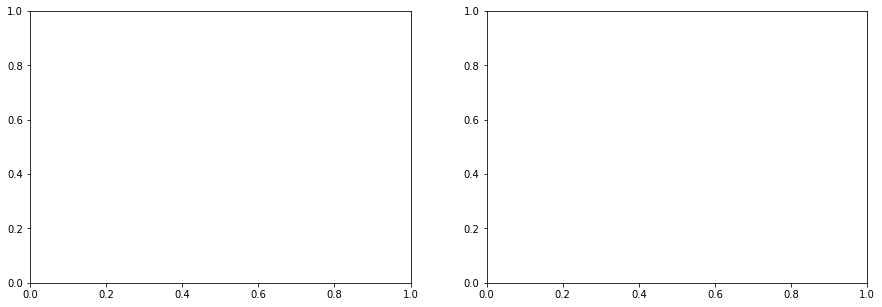